# Crop Recommendation

### Dataset- https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import time
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
directory = 'dataset/cropRecommendation.csv'
df = pd.read_csv(directory)

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


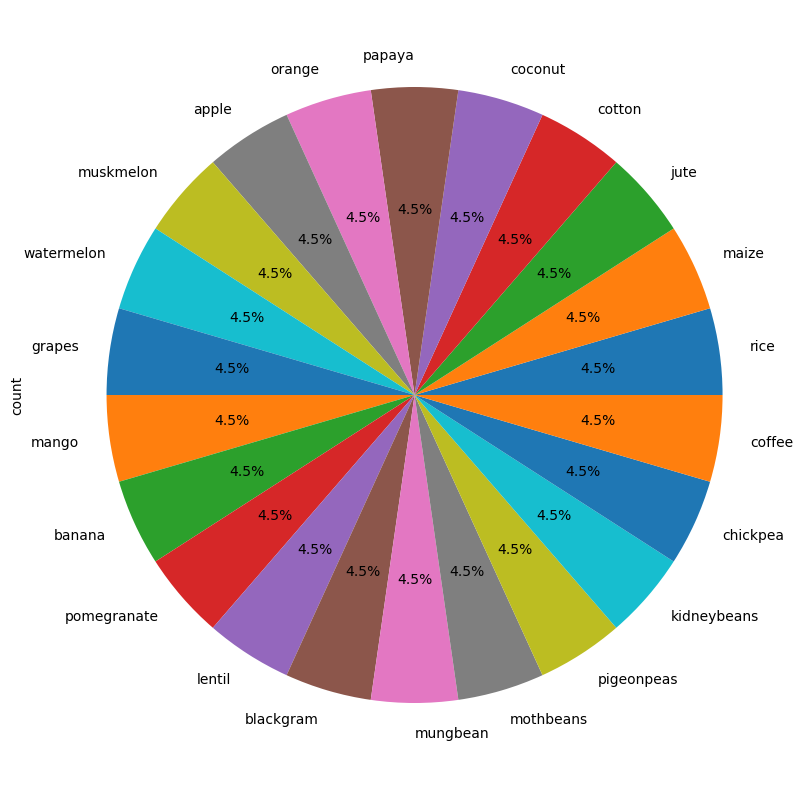

In [4]:
plt.figure(figsize=(10,10))
df['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()

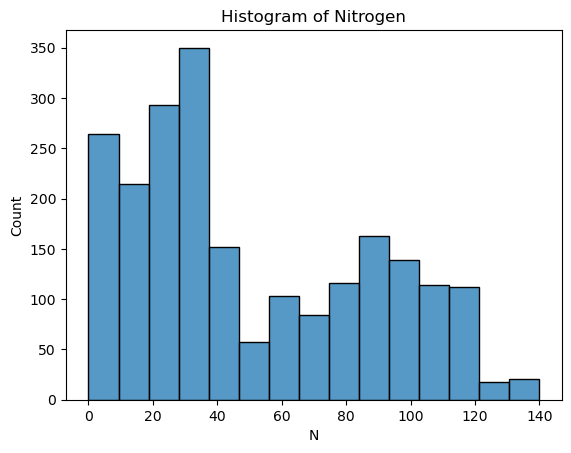

In [5]:
sns.histplot(df['N'])
plt.title('Histogram of Nitrogen')
plt.show()

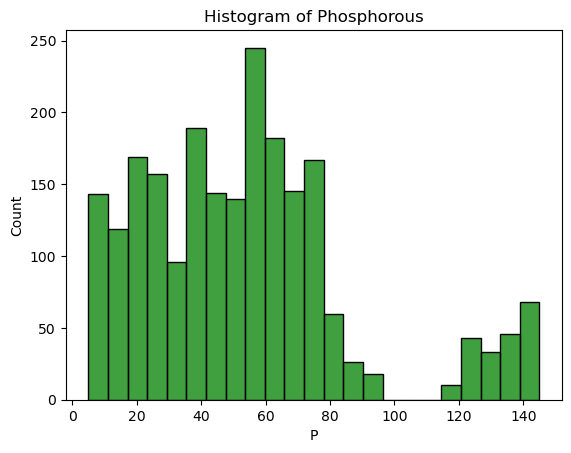

In [6]:
sns.histplot(df['P'],color='Green')
plt.title('Histogram of Phosphorous')
plt.show()

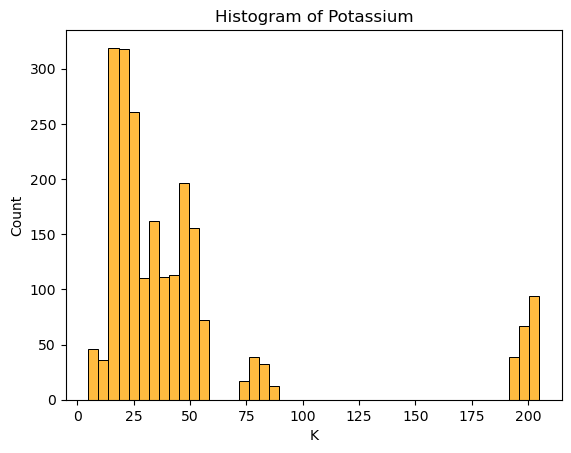

In [7]:
sns.histplot(df['K'],color='Orange')
plt.title('Histogram of Potassium')
plt.show()

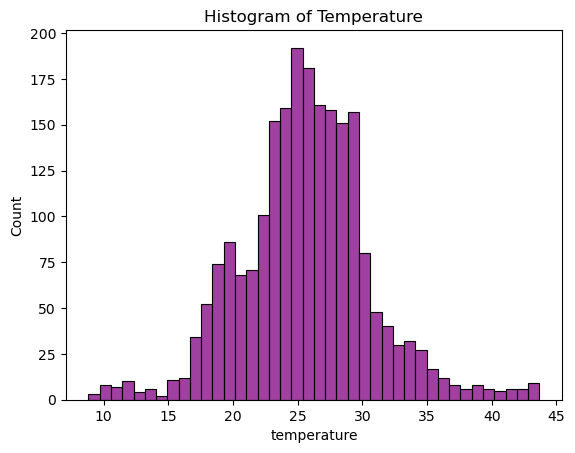

In [8]:
sns.histplot(df['temperature'],color='Purple')
plt.title('Histogram of Temperature')
plt.show()

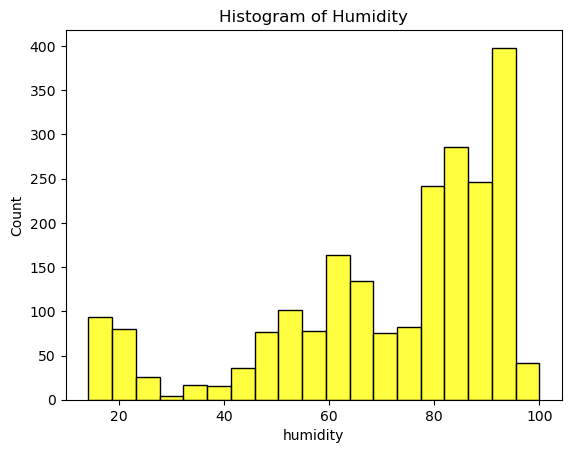

In [9]:
sns.histplot(df['humidity'],color='Yellow')
plt.title('Histogram of Humidity')
plt.show()

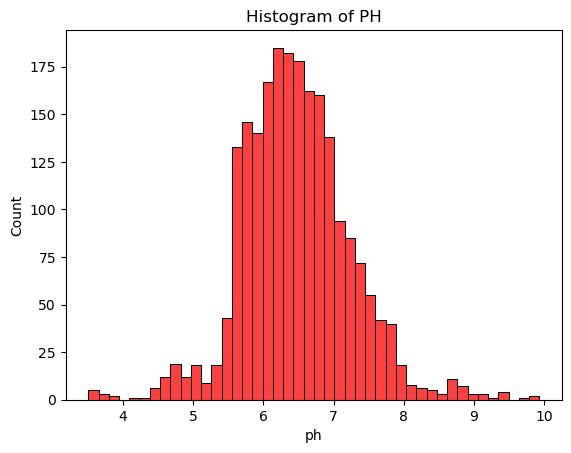

In [10]:
sns.histplot(df['ph'],color='Red')
plt.title('Histogram of PH')
plt.show()

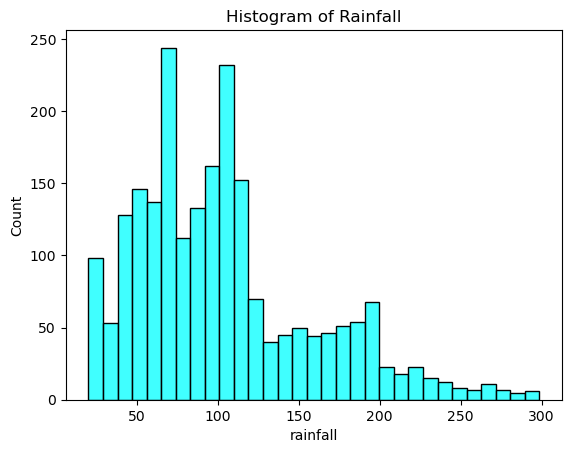

In [11]:
sns.histplot(df['rainfall'],color='Cyan')
plt.title('Histogram of Rainfall')
plt.show()

In [12]:
# Define the label mapping dictionary
label_mapping = {
    'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 
    'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 
    'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 
    'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21
}

# Map the label column using the dictionary
df['label'] = df['label'].map(label_mapping)

In [13]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [14]:
x = df.drop('label',axis=1)
y = df['label']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

## Algorithms

In [16]:
# Random Forest
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Example parameters
rf_model.fit(X_train, y_train)
train_time_rf = time.time() - start_time

In [17]:
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

f1_rf = f1_score(y_test, y_pred_test_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_test_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_test_rf, average='weighted')

print("Random Forest:")
print(f"Training Accuracy: {train_accuracy_rf}")
print(f"Testing Accuracy: {test_accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Recall: {recall_rf}")
print(f"Precision: {precision_rf}")
print(f"Training Time: {train_time_rf}\n")

Random Forest:
Training Accuracy: 0.9982954545454545
Testing Accuracy: 0.9931818181818182
F1 Score: 0.9931754816901672
Recall: 0.9931818181818182
Precision: 0.9937348484848485
Training Time: 0.8707852363586426



In [18]:
# Support Vector Machine
start_time = time.time()
svm_model = SVC()
svm_model.fit(X_train, y_train)
train_time_svm = time.time() - start_time

In [19]:
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

f1_svm = f1_score(y_test, y_pred_test_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_test_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_test_svm, average='weighted')

print("Support Vector Machine:")
print(f"Training Accuracy: {train_accuracy_svm}")
print(f"Testing Accuracy: {test_accuracy_svm}")
print(f"F1 Score: {f1_svm}")
print(f"Recall: {recall_svm}")
print(f"Precision: {precision_svm}")
print(f"Training Time: {train_time_svm}\n")

Support Vector Machine:
Training Accuracy: 0.98125
Testing Accuracy: 0.9613636363636363
F1 Score: 0.9612434056986235
Recall: 0.9613636363636363
Precision: 0.9672692837465565
Training Time: 0.10809922218322754



In [20]:
# Multinomial Naive Bayes
start_time = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
train_time_nb = time.time() - start_time

In [21]:
y_pred_train_nb = nb_model.predict(X_train)
y_pred_test_nb = nb_model.predict(X_test)

train_accuracy_nb = accuracy_score(y_train, y_pred_train_nb)
test_accuracy_nb = accuracy_score(y_test, y_pred_test_nb)

f1_nb = f1_score(y_test, y_pred_test_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_test_nb, average='weighted')
precision_nb = precision_score(y_test, y_pred_test_nb, average='weighted')

print("Multinomial Naive Bayes:")
print(f"Training Accuracy: {train_accuracy_nb}")
print(f"Testing Accuracy: {test_accuracy_nb}")
print(f"F1 Score: {f1_nb}")
print(f"Recall: {recall_nb}")
print(f"Precision: {precision_nb}")
print(f"Training Time: {train_time_nb}\n")

Multinomial Naive Bayes:
Training Accuracy: 0.89375
Testing Accuracy: 0.8590909090909091
F1 Score: 0.8557241129414473
Recall: 0.8590909090909091
Precision: 0.8614369795971613
Training Time: 0.0067291259765625



In [22]:
from joblib import dump, load

# Save the Multinomial Naive Bayes model
dump(rf_model, 'model.joblib')

['model.joblib']

In [23]:
# Load the saved Multinomial Naive Bayes model
from joblib import load

loaded_model = load('model.joblib')

label_mapping = {
    0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 
    6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 
    12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 
    17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'
}

N = 24
P = 128
K = 196
temperature = 23
humidity = 91
ph = 6.5
rainfall = 110

def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    
    prediction = loaded_model.predict([[N, P, K, temperature, humidity, ph, rainfall]])
    return prediction[0]

# Get the recommended crop
recommended_crop = recommend_crop(N, P, K, temperature, humidity, ph, rainfall)

print("Recommended Crop:", label_mapping[recommended_crop])

Recommended Crop: apple
